In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
B=pd.read_csv('/content/drive/My Drive/SCS_Online_Workshop/car_sales.csv',index_col=0)
B.head()


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
X=pd.DataFrame(B.drop(['Manufacturer','Model','Type','Min.Price','Max.Price','Cylinders','Make'],axis=1))
X

,Price,MPG.city,MPG.highway,AirBags,DriveTrain,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,15.9,25,31,None,Front,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,33.9,18,25,Driver & Passenger,Front,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,29.1,20,26,Driver only,Front,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,37.7,19,26,Driver & Passenger,Front,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,30.0,22,30,Driver only,Rear,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,19.7,17,21,None,Front,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
90,20.0,21,30,None,Front,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
91,23.3,18,25,None,Front,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
92,22.7,21,28,Driver only,Rear,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               93 non-null     float64
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   AirBags             93 non-null     object 
 4   DriveTrain          93 non-null     object 
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     int64  
 7   RPM                 93 non-null     int64  
 8   Rev.per.mile        93 non-null     int64  
 9   Man.trans.avail     93 non-null     object 
 10  Fuel.tank.capacity  93 non-null     float64
 11  Passengers          93 non-null     int64  
 12  Length              93 non-null     int64  
 13  Wheelbase           93 non-null     int64  
 14  Width               93 non-null     int64  
 15  Turn.circle         93 non-null     int64  
 16  Rear.seat.

In [ ]:
X_mta=X['Man.trans.avail'].value_counts()
X_mta

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

In [ ]:
type(X_mta)

pandas.core.series.Series

In [ ]:
X['Man.trans.avail']=X['Man.trans.avail'].replace({'Yes':0,'No':1})


In [ ]:
X

,Price,MPG.city,MPG.highway,AirBags,DriveTrain,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,15.9,25,31,None,Front,1.8,140,6300,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,33.9,18,25,Driver & Passenger,Front,3.2,200,5500,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,29.1,20,26,Driver only,Front,2.8,172,5500,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,37.7,19,26,Driver & Passenger,Front,2.8,172,5500,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,30.0,22,30,Driver only,Rear,3.5,208,5700,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,19.7,17,21,None,Front,2.5,109,4500,2915,0,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
90,20.0,21,30,None,Front,2.0,134,5800,2685,0,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
91,23.3,18,25,None,Front,2.8,178,5800,2385,0,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
92,22.7,21,28,Driver only,Rear,2.3,114,5400,2215,0,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [ ]:
np.corrcoef(X['Price'],X['Man.trans.avail'])

array([[1.        , 0.32650443],
       [0.32650443, 1.        ]])

In [ ]:
X_O=X['Origin'].value_counts()
X_O


USA        48
non-USA    45
Name: Origin, dtype: int64

In [ ]:
X['Origin']=X['Origin'].replace({'USA':0,'non-USA':1})
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               93 non-null     float64
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   AirBags             93 non-null     object 
 4   DriveTrain          93 non-null     object 
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     int64  
 7   RPM                 93 non-null     int64  
 8   Rev.per.mile        93 non-null     int64  
 9   Man.trans.avail     93 non-null     int64  
 10  Fuel.tank.capacity  93 non-null     float64
 11  Passengers          93 non-null     int64  
 12  Length              93 non-null     int64  
 13  Wheelbase           93 non-null     int64  
 14  Width               93 non-null     int64  
 15  Turn.circle         93 non-null     int64  
 16  Rear.seat.

In [ ]:
X['AirBags']

1                   None
2     Driver & Passenger
3            Driver only
4     Driver & Passenger
5            Driver only
             ...        
89                  None
90                  None
91                  None
92           Driver only
93    Driver & Passenger
Name: AirBags, Length: 93, dtype: object

In [ ]:
X['AirBags']=X['AirBags'].replace({'None':0,'Driver only':1,'Driver & Passenger':2})
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               93 non-null     float64
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   AirBags             93 non-null     int64  
 4   DriveTrain          93 non-null     object 
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     int64  
 7   RPM                 93 non-null     int64  
 8   Rev.per.mile        93 non-null     int64  
 9   Man.trans.avail     93 non-null     int64  
 10  Fuel.tank.capacity  93 non-null     float64
 11  Passengers          93 non-null     int64  
 12  Length              93 non-null     int64  
 13  Wheelbase           93 non-null     int64  
 14  Width               93 non-null     int64  
 15  Turn.circle         93 non-null     int64  
 16  Rear.seat.

In [ ]:
X['DriveTrain']=X['DriveTrain'].replace({'Front':0,'Rear':1,'4WD':2})
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               93 non-null     float64
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   AirBags             93 non-null     int64  
 4   DriveTrain          93 non-null     int64  
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     int64  
 7   RPM                 93 non-null     int64  
 8   Rev.per.mile        93 non-null     int64  
 9   Man.trans.avail     93 non-null     int64  
 10  Fuel.tank.capacity  93 non-null     float64
 11  Passengers          93 non-null     int64  
 12  Length              93 non-null     int64  
 13  Wheelbase           93 non-null     int64  
 14  Width               93 non-null     int64  
 15  Turn.circle         93 non-null     int64  
 16  Rear.seat.

# Treating Missing Values

In [ ]:
X['Rear.seat.room'].describe()

count    91.000000
mean     27.829670
std       2.989072
min      19.000000
25%      26.000000
50%      27.500000
75%      30.000000
max      36.000000
Name: Rear.seat.room, dtype: float64

In [ ]:
X['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)  #try with median

In [ ]:

X['Rear.seat.room'].describe()

count    93.000000
mean     27.822581
std       2.956795
min      19.000000
25%      26.000000
50%      27.500000
75%      30.000000
max      36.000000
Name: Rear.seat.room, dtype: float64

In [ ]:
X['Luggage.room'].describe()

count    82.000000
mean     13.890244
std       2.997967
min       6.000000
25%      12.000000
50%      14.000000
75%      15.000000
max      22.000000
Name: Luggage.room, dtype: float64

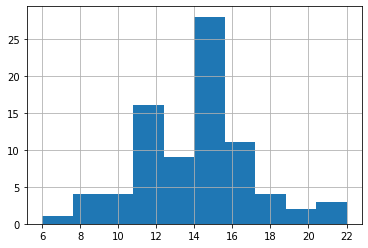

In [ ]:
X['Luggage.room'].hist()

In [ ]:
X['Luggage.room'].fillna(random.choice(X['Luggage.room'].values.tolist()),inplace=True)
X['Luggage.room'].describe()

count    93.000000
mean     13.666667
std       2.879211
min       6.000000
25%      12.000000
50%      14.000000
75%      15.000000
max      22.000000
Name: Luggage.room, dtype: float64

**After filling missing values with random choice **
**Look at the histogram**

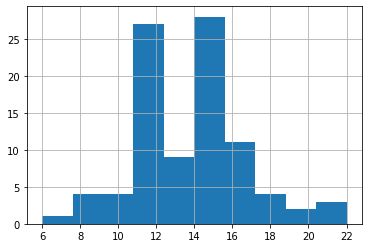

In [ ]:
X['Luggage.room'].hist()

In [ ]:
Y=pd.DataFrame(X['Price'])
type(Y)


pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Price    5.973572e-14
dtype: float64

In [ ]:
X1=pd.DataFrame(X.drop(['Price'],axis=1))


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MPG.city            93 non-null     int64  
 1   MPG.highway         93 non-null     int64  
 2   AirBags             93 non-null     int64  
 3   DriveTrain          93 non-null     int64  
 4   EngineSize          93 non-null     float64
 5   Horsepower          93 non-null     int64  
 6   RPM                 93 non-null     int64  
 7   Rev.per.mile        93 non-null     int64  
 8   Man.trans.avail     93 non-null     int64  
 9   Fuel.tank.capacity  93 non-null     float64
 10  Passengers          93 non-null     int64  
 11  Length              93 non-null     int64  
 12  Wheelbase           93 non-null     int64  
 13  Width               93 non-null     int64  
 14  Turn.circle         93 non-null     int64  
 15  Rear.seat.room      93 non-null     float64
 16  Luggage.ro

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.3,random_state=2)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Price    5.891762
dtype: float64

In [ ]:
mse=cross_val_score(model,X1,Y,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(mse))
rmse

array([6.47377319, 7.29574856, 5.41436168])

In [ ]:
bias_error=np.mean(rmse)
var_error=np.std(rmse,ddof=1)
print(bias_error)
print(var_error)

6.3946278116323745
0.9431872258443303
